In [1]:
#import libraries
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data, wb

import datetime

import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
#get share price, say "BHP" in this case
start = datetime.datetime(2008, 7, 30)
end = datetime.datetime(2018, 7, 30)
BHP = data.get_data_yahoo("BHP.AX",start,end)

[*********************100%***********************]  1 of 1 downloaded


In [3]:
#explore some elements of daily return
BHP['Return']=BHP['Adj Close'].pct_change(1)
BHP['Return'].mean(),BHP['Return'].std(),

(0.00030804369918554093, 0.019737387099807505)

In [4]:
#cumulative return
BHPcumret = (1+BHP['Return']).cumprod()
BHPcumret.iloc[-1]

1.3312176744596014

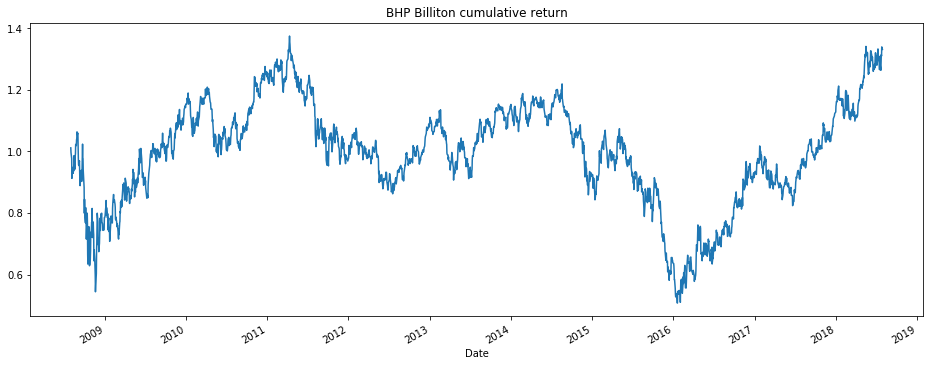

In [5]:
#plot for the cumulative return
BHPcumret.plot(figsize=(16,6),title='BHP Billiton cumulative return')

Text(0.5,1,'Moving Averages of BHP')

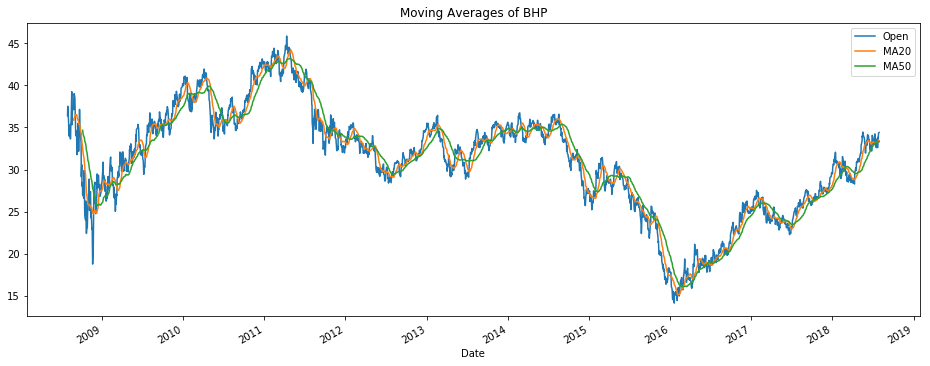

In [6]:
#plot moving averages of BHP
fig, ax=plt.subplots(figsize=(16,6))
BHP['Open'].plot()
BHP['Open'].rolling(20).mean().plot()
BHP['Open'].rolling(50).mean().plot()
plt.legend(('Open','MA20','MA50'))
plt.title('Moving Averages of BHP')

[*********************100%***********************]  1 of 1 downloaded


(<matplotlib.collections.LineCollection at 0x1fb29fd3400>,
 <matplotlib.collections.PolyCollection at 0x1fb29fd34a8>)

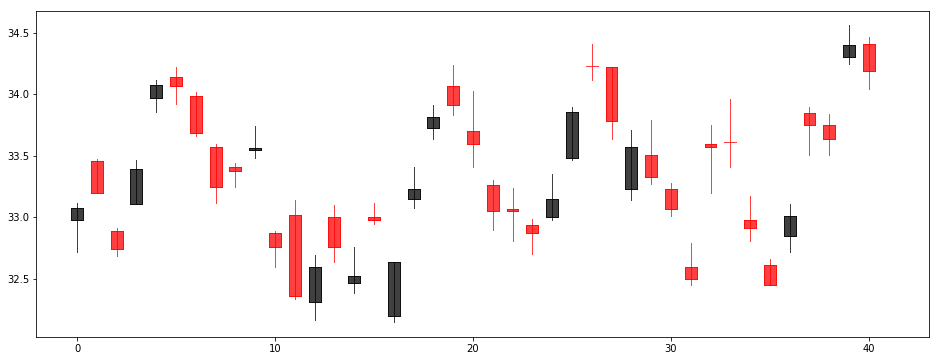

In [7]:
#create a candlestick chart
from mpl_finance import candlestick2_ohlc
start1 = datetime.datetime(2018, 6, 1)
end1 = datetime.datetime(2018, 7, 30)
quotes = data.get_data_yahoo("BHP.AX",start1,end1)
fig, ax = plt.subplots(figsize=(16,6))
candlestick2_ohlc(ax,quotes['Open'],quotes['High'],quotes['Low'],quotes['Close'],width=0.6)

In [8]:
#get multiple stock prices at the same time and get their daily returns
#selected criteria: 4 companies listed in ASX200 with highest market-cap as at 01/7/2018
stocks=['BHP.AX','CBA.AX','WBC.AX','CSL.AX']
BigAuCom=data.get_data_yahoo(stocks,start,end,group_by='ticker')
Return=pd.DataFrame()
for stock in stocks:
    Ret=BigAuCom[stock]['Adj Close'].pct_change(1)
    Return=Return.append(Ret)
Return=Return.T
Return.columns=stocks

[*********************100%***********************]  4 of 4 downloaded


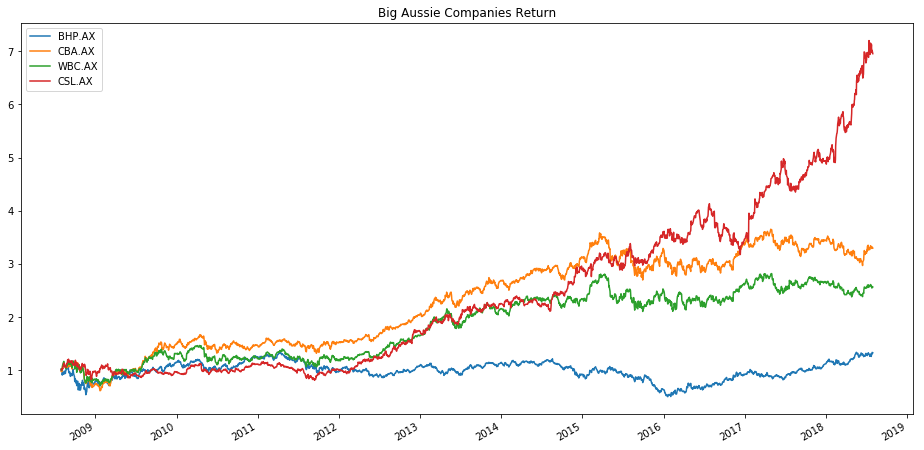

In [9]:
#plot for shares cumulative return
(1+Return).cumprod().plot(legend=True,figsize=(16,8),title='Big Aussie Companies Return')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FB2A297518>,
      dtype=object)

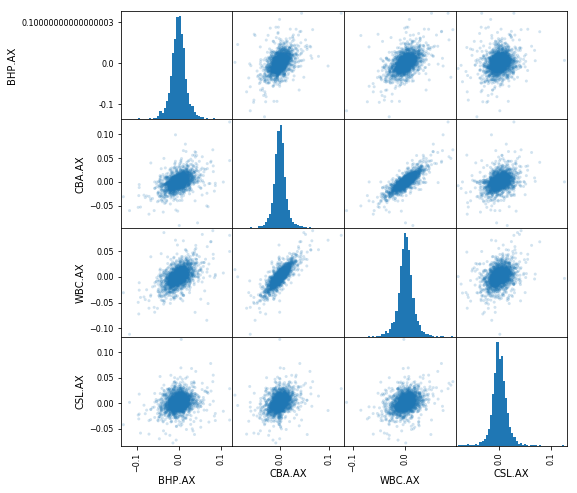

In [10]:
#plot scatter matrix for four stocks
#from pandas import scatter_matrix
a=Return['BHP.AX']
b=Return['CBA.AX']
c=Return['WBC.AX']
d=Return['CSL.AX']
df=pd.concat([a, b, c,d], axis=1, keys=stocks)
pd.plotting.scatter_matrix(df,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50})

In [11]:
#mean and stand deviation of each stock
Return.mean(),Return.std(),

(BHP.AX    0.000308
 CBA.AX    0.000571
 WBC.AX    0.000492
 CSL.AX    0.000869
 dtype: float64, BHP.AX    0.019737
 CBA.AX    0.014019
 WBC.AX    0.015378
 CSL.AX    0.014258
 dtype: float64)

In [12]:
#mean and std for a equal-weighted portlio
Return.T.mean().mean(),Return.T.mean().std()

(0.0005598896958276994, 0.01203458231563192)

In [13]:
#cumulative return for this portfolio
(1+Return.T.mean()).cumprod().iloc[-1]

3.426615362681135

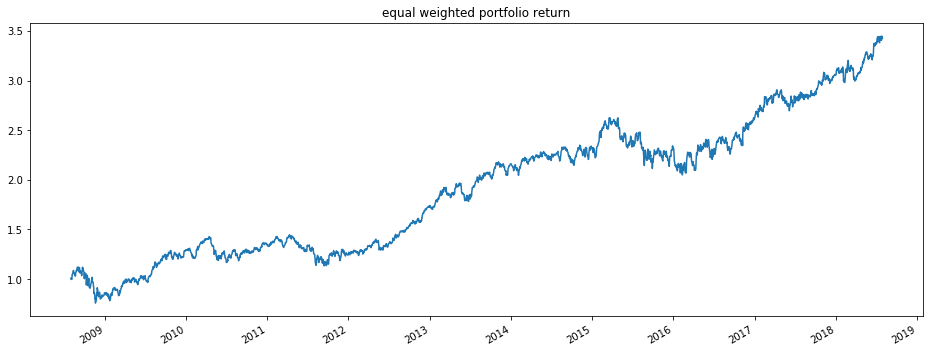

In [14]:
(1+Return.T.mean()).cumprod().plot(figsize=(16,6),title='equal weighted portfolio return')

In [15]:
#take a deeper look at ASX200
start = datetime.datetime(1988, 7, 30)
end = datetime.datetime(2018, 7, 30)
ASX=data.get_data_yahoo('^AXJO',start,end)

[*********************100%***********************]  1 of 1 downloaded


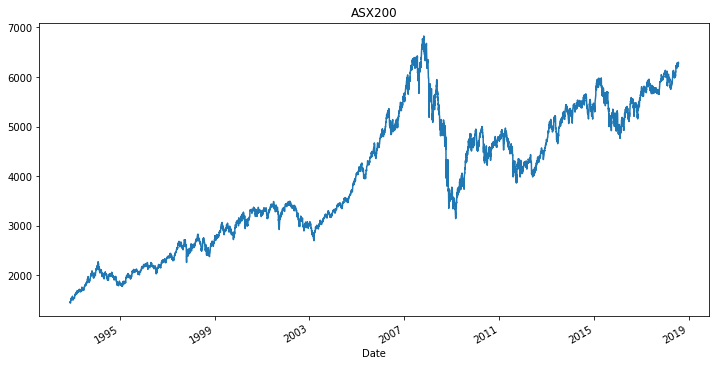

In [16]:
#plot the index
ASX['Close'].plot(figsize=(12,6),title='ASX200')

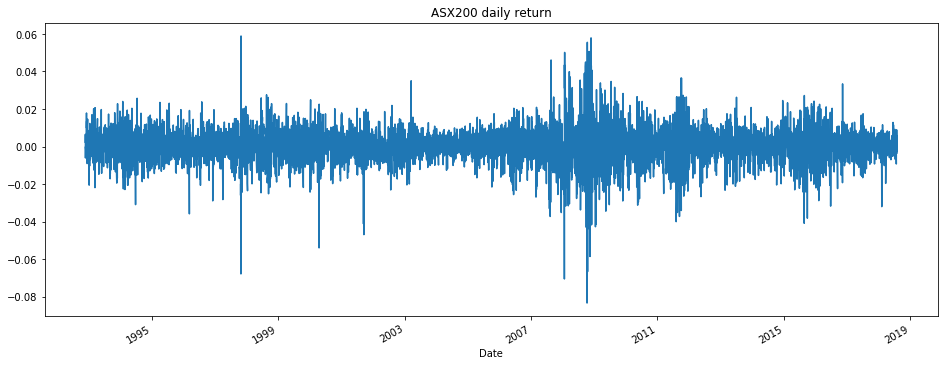

In [17]:
#plot the daily returns
ASX['Return']=ASX['Close'].pct_change(1)
ASX['Return'].plot(figsize=(16,6),title='ASX200 daily return')

In [18]:
#get Australian GDP 
import quandl
AUGDP = quandl.get("RBA/H01").iloc[:,0:2]

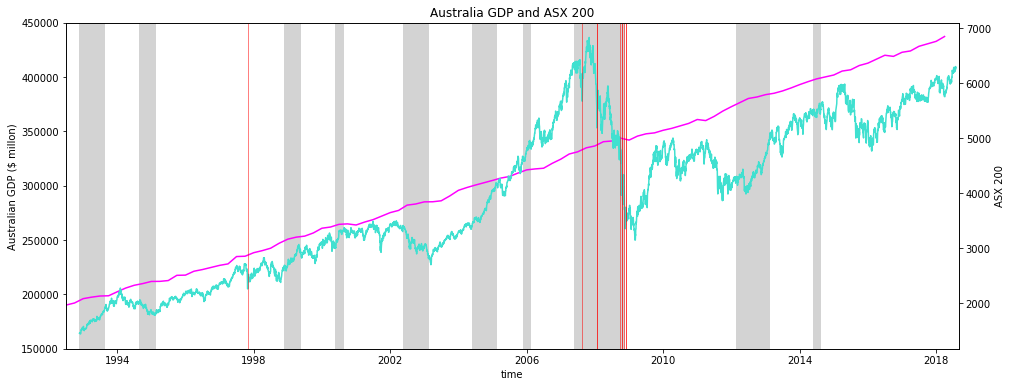

In [19]:
#plot GDP 
fig, ax1 = plt.subplots(figsize=(16,6))
ax1.set_xlabel('time')
ax1.set_ylabel('Australian GDP ($ millon)')
ax1.set_xlim(left=datetime.datetime(1992,6,30),right=datetime.datetime(2018,8,30))
ax1.set_ylim(bottom=150000,top=450000)
ax1.plot(AUGDP.iloc[:,0], color='magenta')
ax1.set_title('Australia GDP and ASX 200')

#plot ASX200 on the same plot
ax2 = ax1.twinx() 

ax2.set_ylabel('ASX 200')  
ax2.plot(ASX['Close'], color='turquoise')

#find the recession period and use grey bar to indicate it 
n=len(AUGDP.iloc[:,1])
recessionperiod=[]
for i in range(n-2):    
    if AUGDP.iloc[:,1][AUGDP.index[i]]>AUGDP.iloc[:,1][AUGDP.index[i+1]] and \
    AUGDP.iloc[:,1][AUGDP.index[i+1]]>AUGDP.iloc[:,1][AUGDP.index[i+2]]:
        recessionperiod.append(AUGDP.index[i])
ax1.bar(recessionperiod,height=450000,width=np.rint(2*(ax1.get_xbound()[1]-ax1.get_xbound()[0])/n)+0.2,color="lightgrey",edgecolor="lightgrey")

#find the 10 worst days in ASX200 history in terms of return
BlackDays=[]
m=10
for i in range(m):
    BlackDays.append(ASX.drop(BlackDays)['Return'].idxmax())
    plt.axvline(BlackDays[i],color="red",lw=0.5)

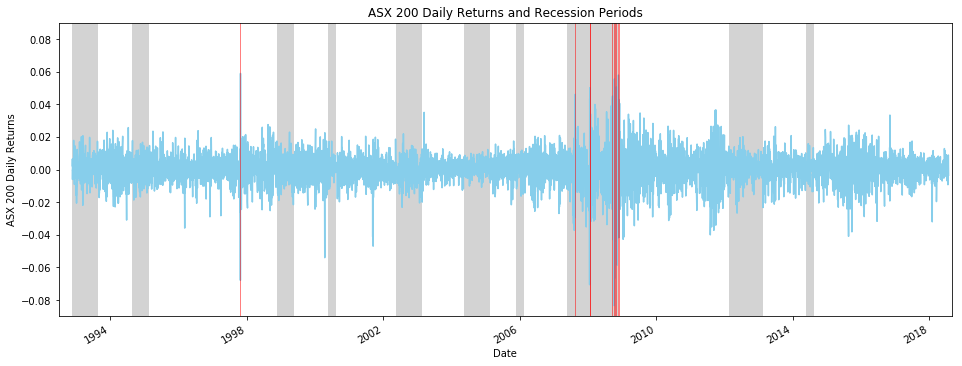

In [20]:
#plot Daily returns and recession periods as well as big drop days for ASX200 in history
fig, ax= plt.subplots(figsize=(16,6))
ASX['Return'].plot(color='skyblue') 
ax.set_ylabel('ASX 200 Daily Returns')
ax.set_title('ASX 200 Daily Returns and Recession Periods')
ax.set_xlim(left=datetime.datetime(1992,6,30),right=datetime.datetime(2018,8,30))
ax.set_ylim(bottom=-0.09,top=0.09)

ax.bar(recessionperiod,height=0.2,bottom=-0.1,width=np.rint(2*(ax.get_xbound()[1]-ax.get_xbound()[0])/n)+0.2,color="lightgrey",edgecolor="lightgrey")
BlackDays=[]
m=10
for i in range(m):
    BlackDays.append(ASX.drop(BlackDays)['Return'].idxmax())
    plt.axvline(BlackDays[i],color="red",lw=0.5)

mean is: 0.0002700597219476297
std is: 0.009449819998820625
kurtosis is: 5.325016481152478
skewness is: -0.36081161202013895


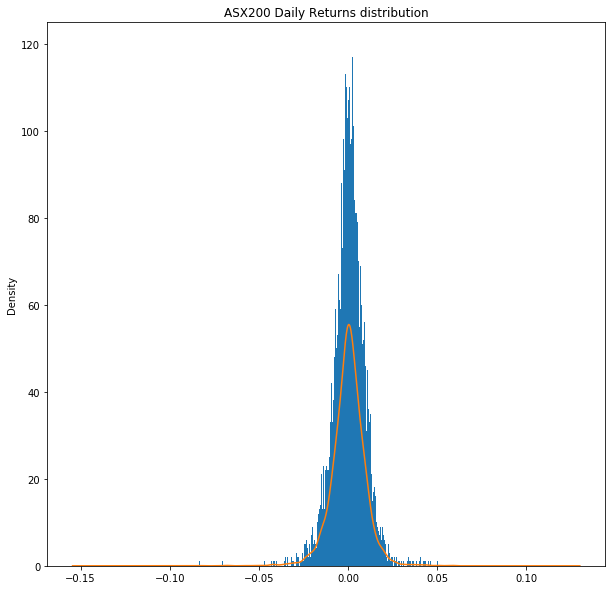

In [21]:
#explore the distribution
fig,ax=plt.subplots(figsize=(10,10))
ASX['Return'].hist(bins=500)
ASX['Return'].plot(kind="kde")
ax.set_title('ASX200 Daily Returns distribution')
#calculate the kurtosis and skewness of the returns
from scipy.stats import kurtosis, skew
print('mean is: {}'.format((ASX['Return'].mean())))
print('std is: {}'.format((ASX['Return'].std())))
print( 'kurtosis is: {}'.format( (ASX['Return'].kurtosis()) ))
print( 'skewness is: {}'.format( (ASX['Return'].skew()) ))

In [22]:
#conditional return distribution based on one-day lag return
#one-day lag return between [-0.02,-0.01] and [0.01,0.02]
Conret1=[];Conret2=[]
for i in range(1,len(ASX['Return'])):
    if ASX['Return'].shift(1)[i] > -0.02 and ASX['Return'].shift(1)[i] < -0.01:
        Conret1.append(ASX['Return'][i])
    if ASX['Return'].shift(1)[i] < 0.02 and ASX['Return'].shift(1)[i] > 0.01:
        Conret2.append(ASX['Return'][i])
Conret1=pd.Series(Conret1);Conret2=pd.Series(Conret2)

Conditional Return between [-0.02,-0.01]
Mean is: -0.0004350923686533918
std is: 0.012535258897720126
kurtosis is: 4.464773398538124
skewness is: -0.6695773569328601
Conditional Return between [0.01,0.02]
Mean is: 0.0003890596531593288
std is: 0.010528040866408229
kurtosis is: 2.387005491595303
skewness is: -0.43689724277116465


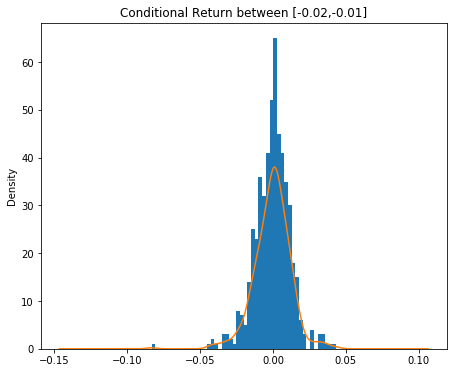

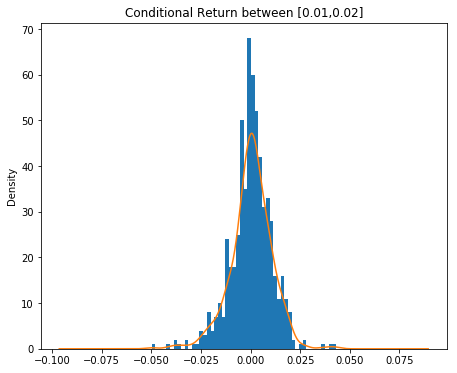

In [23]:
#plot distribution for two conditional return groups
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.hist(Conret1,bins=50)
pd.Series(Conret1).plot(kind='kde')
plt.title('Conditional Return between [-0.02,-0.01]')
print('Conditional Return between [-0.02,-0.01]')
print( 'Mean is: {}'.format( Conret1.mean()) )
print( 'std is: {}'.format(  Conret1.std() ))
print( 'kurtosis is: {}'.format(Conret1.kurtosis()) )
print( 'skewness is: {}'.format( Conret1.skew()) )
plt.figure(figsize=(16,6))
plt.subplot(1,2,2)
plt.hist(Conret2,bins=50)
pd.Series(Conret2).plot(kind='kde')
plt.title('Conditional Return between [0.01,0.02]')
print('Conditional Return between [0.01,0.02]')
print( 'Mean is: {}'.format( Conret2.mean()) )
print( 'std is: {}'.format(  Conret2.std() ))
print( 'kurtosis is: {}'.format(Conret2.kurtosis()) )
print( 'skewness is: {}'.format( Conret2.skew()) )

In [24]:
#get monthly return of ASX200
ASXMonthly=ASX['Close'].groupby(pd.Grouper(freq='M')).tail(1)
ASXMonthly['Return']=ASXMonthly.pct_change(1)

mean is: 0.005479114307276915
std is: 0.037685613288774025
kurtosis is: 0.20499499318660286
skewness is: -0.5339476258441089


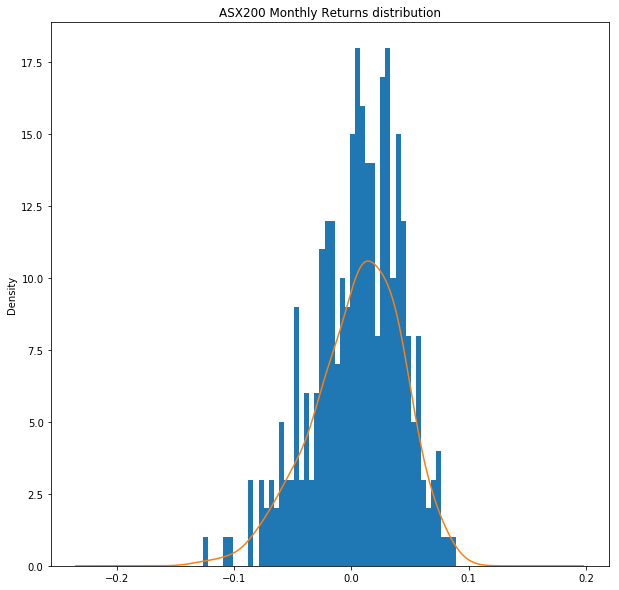

In [25]:
#plot monthly return distribution
fig,ax=plt.subplots(figsize=(10,10))
ASXMonthly['Return'].hist(bins=50)
ASXMonthly['Return'].plot(kind="kde")
ax.set_title('ASX200 Monthly Returns distribution')
#calculate the kurtosis and skewness of the returns
print('mean is: {}'.format((ASXMonthly['Return'].mean())))
print('std is: {}'.format((ASXMonthly['Return'].std())))
print( 'kurtosis is: {}'.format( (ASXMonthly['Return'].kurtosis()) ))
print( 'skewness is: {}'.format( (ASXMonthly['Return'].skew()) ))

In [26]:
#explore return risk trade-off for the big four Aussies 
#correlation matrix
Return.corr()

,BHP.AX,CBA.AX,WBC.AX,CSL.AX
BHP.AX,1.000000,0.451109,0.495399,0.206496
CBA.AX,0.451109,1.000000,0.805401,0.328087
WBC.AX,0.495399,0.805401,1.000000,0.333786
CSL.AX,0.206496,0.328087,0.333786,1.000000


In [27]:
#covariance matrix
Return.cov()

,BHP.AX,CBA.AX,WBC.AX,CSL.AX
BHP.AX,0.000390,0.000125,0.000150,0.000058
CBA.AX,0.000125,0.000197,0.000174,0.000066
WBC.AX,0.000150,0.000174,0.000236,0.000073
CSL.AX,0.000058,0.000066,0.000073,0.000203


Text(0.5,1,'Return Correlation between BHP and CBA')

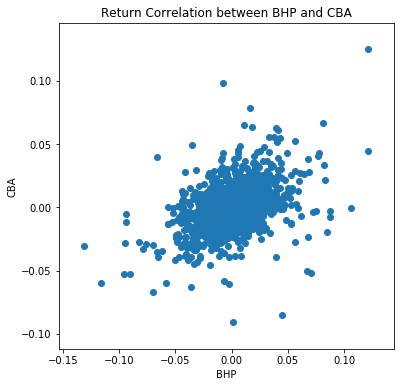

In [28]:
#scatter plot between BHP and CBA
fig, ax = plt.subplots(figsize=(6,6))
plt.scatter(x=Return['BHP.AX'], y=Return['CBA.AX'])
plt.xlabel('BHP')
plt.ylabel('CBA')
plt.title('Return Correlation between BHP and CBA')

In [29]:
#get recent 10-year ASX200 daily return
start = datetime.datetime(2008, 7, 30)
end = datetime.datetime(2018, 7, 30)
ASX10year=data.get_data_yahoo('^AXJO',start,end)
ASX10year['Return']=ASX10year['Close'].pct_change(1)

[*********************100%***********************]  1 of 1 downloaded


Text(0.5,1,'Return Correlation between BHP and ASX200\n Fitting Linear Regression')

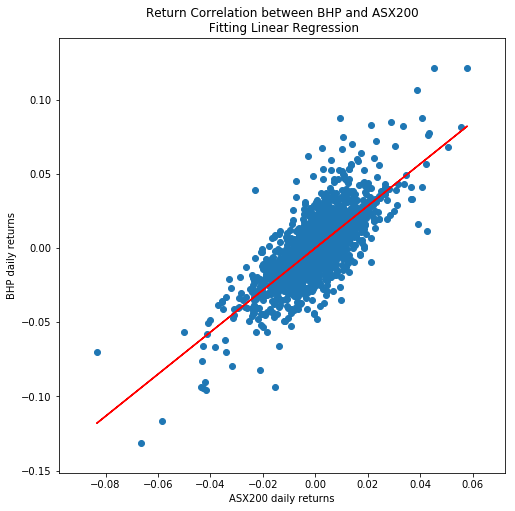

In [30]:
import statsmodels.api as sm
x=ASX10year['Return'].values
y=Return['BHP.AX'][ASX10year.index].values#make sure length the same
#fit the model between BHP and ASX200
x=sm.add_constant(x)
fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(x=ASX10year['Return'].values, y=Return['BHP.AX'][ASX10year.index].values)
ols_fit = sm.OLS(y[1:],x[1:]).fit()
#plot the fit line and points
plt.plot(ASX10year['Return'][1:], ols_fit.fittedvalues, 'r')#make sure to drop NA for this to show
plt.xlabel('ASX200 daily returns')
plt.ylabel('BHP daily returns')
plt.title('Return Correlation between BHP and ASX200\n Fitting Linear Regression')

Text(0.5,1,'Simulated Joint Normal Distribution Using BHP and CBA')

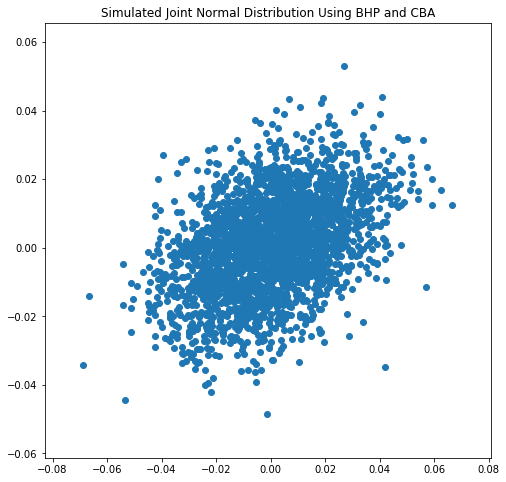

In [31]:
#simulate a join normal distribution using mean and variance-covariance matrix of BHP and CBA
mean = [Return['BHP.AX'].mean(), Return['CBA.AX'].mean()]
cov = Return.cov().iloc[0:2,0:2]  # diagonal covariance
x, y = np.random.multivariate_normal(mean, cov, len(Return['BHP.AX'])).T
plt.figure(figsize=(8,8))
plt.scatter(x, y)
plt.title('Simulated Joint Normal Distribution Using BHP and CBA')